<a href="https://colab.research.google.com/github/Bruno-M-N/TopEspInstrII---Bases-de-Dados-Desbalanceadas/blob/master/Bases_de_Dados_Desbalanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tópicos Especiais em Instrumentação I: Inteligência Computacional II


**Universidade Federal do Rio Grande do Sul**
>ENG4019: Tópicos Especiais em Instrumentação I: Inteligência Computacional I       

>Título: Bases de Dados Desbalanceadas

>Resumo: 

>@author:
*   Bruno Moreira Nabinger                      
  (bruno.nabinger@gmail.com)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive

MyDrive


# Pip Install

# Path

In [ ]:
# Diretório Principal
path = '/content/drive/MyDrive/Colab Notebooks/UFRGS/ENG4026 - Tópicos Especiais em Instrumentação II'

# Parâmetros para exportação de tabelas LaTeX
pathTab = path + '/tab/'

# Imports 

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report



# Definição das funções que exibem a Matriz de Confusão e o Classification Report

In [ ]:
"""
Parse and convert scikit-learn classification_report to latex 
(Python 3/Booktabs) 
cfreportlatex.py (modified)
Author: Francisco Rodrigues (modified)
https://gist.github.com/FRodrigues21/bec41ee4305c027bcdf9987313182e9b

Code to parse sklearn classification_report
Original: https://gist.github.com/julienr/6b9b9a03bd8224db7b4f
Modified to work with Python 3 and classification report averages
"""

import sys
import collections

def parse_classification_report(clfreport):
    """
    Parse a sklearn classification report into a dict keyed by class name
    and containing a tuple (precision, recall, fscore, support) for each class
    """
    lines = clfreport.split('\n')
    # Remove empty lines
    lines = list(filter(lambda l: not len(l.strip()) == 0, lines))

    # Starts with a header, then score for each class and finally an average
    header = lines[0]
    cls_lines = lines[1:-1]
    avg_line = lines[-1]

    assert header.split() == ['precision', 'recall', 'f1-score', 'support']
    assert avg_line.split()[1] == 'avg'

    # We cannot simply use split because class names can have spaces. So instead
    # figure the width of the class field by looking at the indentation of the
    # precision header
    cls_field_width = len(header) - len(header.lstrip())
    # Now, collect all the class names and score in a dict
    def parse_line(l):
        """Parse a line of classification_report"""
        cls_name = l[:cls_field_width].strip()
        if (len(l[cls_field_width:].split()) == 4):
          precision, recall, fscore, support = l[cls_field_width:].split()
          precision = float(precision)
          recall = float(recall)
          fscore = float(fscore)
          support = int(support)
        else:
          fscore, support = l[cls_field_width:].split()
          precision = str("")
          recall = str("")
          fscore = float(fscore)
          support = int(support)
        return (cls_name, precision, recall, fscore, support)

    data = collections.OrderedDict()
    for l in cls_lines:
        ret = parse_line(l)
        cls_name = ret[0]
        scores = ret[1:]
        data[cls_name] = scores

    # average
    data['avg'] = parse_line(avg_line)[1:]

    return data

def report_to_latex_table(data, model):
    classificationReportFileName = "classification-report-" + model #.tex
    title = f"Classification report para o {model}"
    caption = title + r". \\ \textbf{Fonte -} Autor."
    label = "tab: " + classificationReportFileName  #.tex
    avg_split = False
    out =  f"%{classificationReportFileName}\n"
    out += (r"% A Tabela \ref{" f"{label}" r"} exibe o \textit{" f"{title}"
                 r"}" + "\n")
    out += (r"% \input{Tabelas/" f"{classificationReportFileName}" r"}" + "\n")
    out += (r"% Please add the following required packages to your"
                 r"document preamble:" + "\n")
    out += r"% \usepackage{booktabs}" + "\n"
    out += "\\begin{table}[H]\n"
    out += "    " + "\\centering\n"
    out += "    " + r"\begin{tabular}{@{}ccccc@{}}" + "\n"
    out += "    " + "\\toprule\n"
    out += ("    " + r" & \textbf{Precision} & \textbf{Recall} &"
            + r"\textbf{F-score} & \textbf{Support} \\ \midrule " + "\n")
    for cls, scores in data.items():
        if 'micro' in cls:
            out += "\\midrule\n"
        out += "    " + cls + " & " + " & ".join([str(s) for s in scores])
        out += r" \\ " + "\n"
    out += "    " + "\\end{tabular}\n"
    out += ("    " + r"\caption{" + caption + r"}" + "\n")
    out += ("    " + r"\label{" + label + r"}" + "\n")
    out += "\\end{table}"
    return out

In [ ]:
def printConfusionMatrix(y_true, y_pred, model):
  # print(y_test)
  # print(y_pred)
  # extract the predicted class labels
  y_pred_class = np.where(y_pred > 0.5, 1, 0)
  confmat = confusion_matrix(y_true = y_true, y_pred = y_pred_class)
  # print(confmat)
  print(f"Matriz de confusão para o {model}")
  print(f"Verdadeiro positivo:  {confmat[0,0]}" 
        f" Falso negativo:      {confmat[0,1]}\n"
        f"Falso positivo:       {confmat[1,0]}" 
        f" Verdadeiro negativo: {confmat[1,1]}")
  
  confusionMatrixFileName = "matriz-confusao-" + model #.tex
  title = f"Matriz de confusão para o {model}"
  caption = title + r". \\ \textbf{Fonte -} Autor."
  label = "tab: " + confusionMatrixFileName  #.tex
  header = (r'& \textbf{} & \multicolumn{2}{c}{\textbf{Rótulo Verdadeiro}}'
            + r'\\ \midrule')
  
  tableTEX =  f"%{confusionMatrixFileName}\n"
  tableTEX += (r"% A Tabela \ref{" f"{label}" r"} exibe a " f"{title}\n")
  tableTEX += (r"% \input{Tabelas/" f"{confusionMatrixFileName}" r"}" + "\n")
  tableTEX += (r"% Please add the following required packages to your"
               r"document preamble:" + "\n")
  tableTEX += r"% \usepackage{booktabs}" + "\n"
  tableTEX += r"% \usepackage{multirow}" + "\n"
  tableTEX += r"\begin{table}[H]" + "\n"
  tableTEX += ("    " + r"\centering" + "\n")
  tableTEX += ("    " + r"\begin{tabular}{@{}cccc@{}}" + "\n")
  tableTEX += ("    " + r"\toprule" + "\n")
  tableTEX += ("    " + header + "\n")
  tableTEX += ("    " + r" &  & \begin{tabular}[c]{@{}c@{}}Olho\\ Fechado"
               + r"\end{tabular} & \begin{tabular}[c]{@{}c@{}}Olho\\  Aberto"
               + r"\end{tabular} \\" + "\n")
  tableTEX += ("    " + r"\multirow{2}{*}{\textbf{\begin{tabular}[c]{@{}c@{}}"
               + r"Rótulo\\  Predito\end{tabular}}} & "
               + r"\begin{tabular}[c]{@{}c@{}}Olho\\ Fechado\end{tabular} & "
               + f"{confmat[0, 0]} & {confmat[0, 1]}" + r" \\ " + "\n")
  tableTEX += ("    " + r"& \begin{tabular}[c]{@{}c@{}}Olho\\  "
               + r"Aberto\end{tabular} & "
               + f"{confmat[1, 0]} & {confmat[1, 1]}" + r" \\ \bottomrule"
                + "\n")
  tableTEX += ("    " + r"\end{tabular}" + "\n")
  tableTEX += ("    " + r"\caption{" + caption + r"}" + "\n")
  tableTEX += ("    " + r"\label{" + label + r"}" + "\n")
  tableTEX += "\end{table}" + "\n"

  arquivo = open(pathTab + confusionMatrixFileName + '.tex','w')
  arquivo.write(tableTEX)
  arquivo.close()

def printClassificationReport(y_true, y_pred, model):
  print(f"Classification report para o {model}")
  # extract the predicted class labels
  y_pred_class = np.where(y_pred > 0.5, 1, 0)
  print(classification_report(y_true, y_pred_class))
  
  data = parse_classification_report(classification_report(y_true,
                                                           y_pred_class))
  # print(report_to_latex_table(data, model))
  
  classificationReportFileName = "classification-report-" + model #.tex
  arquivo = open(pathTab + classificationReportFileName + '.tex','w')
  arquivo.write(report_to_latex_table(data, model))
  arquivo.close()

# Questão II

Tarefa no Laboratório: digitar, executar e avaliar o seguinte código para construir um pipeline de um modelo inteligente qualquer para classificar os dados desbalanceados do
conjunto de dados do item anterior. Utilizar APENAS os dados disponibilizados na Pasta DOCUMENTOS da nossa comunidade no MCOnf©. Baixar o arquivo nomeado de “wbdc.data”. Abrir o ambiente de programação Python, digitar o correspondente código
e analisar o mesmo.



|    N    |    %    |
| ------- | ------- |
|   569   |   100   |
|   357   |  62,74  |

In [ ]:
import pandas as pd
# df = pd.read_csv('C:/Users/Usuário/Desktop/wdbc.data', header=None)
# df = pd.read_csv(path + '/datasets/wdbc.data', header=None)
df = pd.read_csv(path + '/datasets/wdbc.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(569, 32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y =df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M', 'B'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    stratify = y,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components = 2),
                         LogisticRegression(random_state = 1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Modelo LogisticRegression")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo LogisticRegression")

Acurácia do Teste: 0.956

Matriz de confusão para o Modelo LogisticRegression
Verdadeiro positivo:  71 Falso negativo:      1
Falso positivo:       4 Verdadeiro negativo: 38

Classification report para o Modelo LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Questão III
Tarefa para Casa: considerando-se a Tarefa ii avaliar o impacto de outros modelos inteligentes pertinentes na classificação da base desbalanceada utilizada anteriormente. Apresentar o código desenvolvido para cada modelo proposto e avaliaro impacto dos mesmos na classificação e evidentemente da base desbalanceada utilizada.


## SVC

In [ ]:
from sklearn.svm import SVC

# criação de pipeline
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components = 2),
                         SVC(C = 1, kernel = 'rbf', gamma = 0.001,
                             cache_size = 500, random_state = 1))
# Treinamento
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

print ('Acurácia do Teste: %.3f' %pipe_svc.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo SVC")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo SVC")

Acurácia do Teste: 0.956

Matriz de confusão para o Modelo SVC
Verdadeiro positivo:  72 Falso negativo:      0
Falso positivo:       5 Verdadeiro negativo: 37

Classification report para o Modelo SVC
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### Curva de aprendizado - *Learning Curve*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html Determines cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

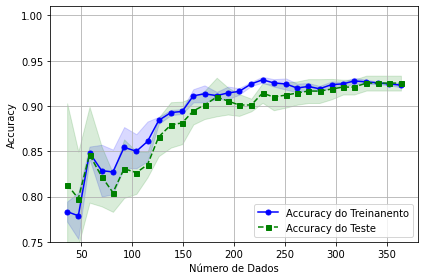

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator = pipe_svc, X = X_train,
                   y = y_train,
                   train_sizes = np.linspace(0.1, 1.0, 30), cv = 5,
                   n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,
         label='Accuracy do Treinanento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle = '--', marker='s',
         markersize = 5, label = 'Accuracy do Teste')
# não estaria incorreto chamar de Accuracy da Validação, do ponto de vista de
# Instrumentação
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Número de Dados')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.75, 1.01])
plt.tight_layout()
plt.show()

### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV

param_C_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_grid = [
              # {'svc__C': param_C_range, 'svc__kernel': ['linear']},
              {'svc__C': param_C_range, 'svc__gamma': param_gamma_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', refit = True, cv = 5, n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
print('Accuracy do Teste: %.3f' %clf.score(X_test, y_test))

0.945054945054945
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Accuracy do Teste: 0.965


In [ ]:
from sklearn.svm import SVC

# criação de pipeline
pipe_svc_otimizada = make_pipeline(StandardScaler(), PCA(n_components = 2),
                         SVC(C = 100, kernel = 'rbf', gamma = 0.001,
                             cache_size = 500, random_state = 1))
# Treinamento
pipe_svc_otimizada.fit(X_train, y_train)
y_pred = pipe_svc_otimizada.predict(X_test)

print ('Acurácia do Teste: %.3f' %pipe_svc_otimizada.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Modelo SVC Otimizado")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo SVC Otimizado")

Acurácia do Teste: 0.965

Matriz de confusão para o Modelo SVC Otimizado
Verdadeiro positivo:  71 Falso negativo:      1
Falso positivo:       3 Verdadeiro negativo: 39

Classification report para o Modelo SVC Otimizado
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Random Florest

In [ ]:
# criação de pipeline
pipe_random_forest = make_pipeline(StandardScaler(), PCA(n_components = 2),
                                   RandomForestClassifier(random_state = 1))
# Treinamento
pipe_random_forest.fit(X_train, y_train)
y_pred = pipe_random_forest.predict(X_test)

print ('Acurácia do Teste: %.3f' %pipe_random_forest.score(X_test, y_test))
print ('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                y_pred)))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Modelo Random Forest")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo Random Forest")

Acurácia do Teste: 0.777
Random Forest 
Accuracy:0.777

Matriz de confusão para o Modelo Random Forest
Verdadeiro positivo:  6042 Falso negativo:      766
Falso positivo:       1247 Verdadeiro negativo: 990

Classification report para o Modelo Random Forest
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      6808
           1       0.56      0.44      0.50      2237

    accuracy                           0.78      9045
   macro avg       0.70      0.67      0.68      9045
weighted avg       0.76      0.78      0.77      9045



# Questão IV - Acentuado o problema

Tarefa no Laboratório: analisando-se o conjunto de dados original disponibilizado é perceptível que essa base de dados possui um tamanho amostral de 569 dados sendo 357 dados representando tumores benignos (por exemplo, denominada de classe 0) e 212 dados representando tumores malignos (por exemplo, denominada de classe 1).
Nesta tarefa deverão forçar um desbalanço ainda maior e analisar o impacto na
classificação usando a mesma abordagem inteligente da Tarefa ii (considerei que o código abaixo segue na sequência do código da Tarefa ii para ganhar tempo em sala de aula – posteriormente sugiro torná-los independentes). Basicamente anexei verticalmente 40 dados da classe 1 (usando a função do numpy vstack) à classe 0 (357 amostras) gerando um total de 397 instâncias ou dados. Da mesma forma, anexei horizontalmente 40 dados da classe 1 (tumor maligno) aos 357 dados da classe 0 (tumor benigno) usando a função do numpy hstack. Abrir o ambiente de programação Python, digitar o correspondente código e analisar o mesmo.

## 357 + 40

|    N    |    %    |
| ------- | ------- |
|   397   |   100   |
|   357   |  89,92  |

In [ ]:
X_adaptado = np.vstack((X[y==0], X[y==1][:40]))
y_adaptado = np.hstack((y[y==0], y[y==1][:40]))
y_pred = np.zeros(y_adaptado.shape[0])
np.mean(y_pred == y_adaptado) * 100

89.92443324937027

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_adaptado, y_adaptado,
                                                    test_size = 0.20,
                                                    stratify = y_adaptado,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression IV")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression IV")

Acurácia do Teste: 0.963

Matriz de confusão para o Modelo LogisticRegression IV
Verdadeiro positivo:  72 Falso negativo:      0
Falso positivo:       3 Verdadeiro negativo: 5

Classification report para o Modelo LogisticRegression IV
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.62      0.77         8

    accuracy                           0.96        80
   macro avg       0.98      0.81      0.87        80
weighted avg       0.96      0.96      0.96        80



# Questão V - Testando outras divisões, que evidenciam a natureza do problema

Tarefa para Casa: realizar o mesmo procedimento da Tarefa iv com outras duas
configurações de divisão, porém mantendo a classe 0 com seu tamanho original, ou seja, as mesmas 357 amostras do dataset original, ou seja, com x dados da classe 1 anexados a cada array. Testar e discutir.

## 357 + 80

|    N    |    %    |
| ------- | ------- |
|   437   |   100   |
|   357   |  81,69  |

In [ ]:
X_adaptado_add80 = np.vstack((X[y==0], X[y==1][:80]))
y_adaptado_add80 = np.hstack((y[y==0], y[y==1][:80]))
y_pred = np.zeros(y_adaptado_add80.shape[0])
np.mean(y_pred == y_adaptado_add80) * 100

81.6933638443936

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_adaptado_add80, y_adaptado_add80,
                                                    test_size = 0.20,
                                                    stratify = y_adaptado_add80,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression V - 80")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression V - 80")

Acurácia do Teste: 0.955

Matriz de confusão para o Modelo LogisticRegression V - 80
Verdadeiro positivo:  72 Falso negativo:      0
Falso positivo:       4 Verdadeiro negativo: 12

Classification report para o Modelo LogisticRegression V - 80
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.75      0.86        16

    accuracy                           0.95        88
   macro avg       0.97      0.88      0.92        88
weighted avg       0.96      0.95      0.95        88



## 357 + 120

|    N    |    %    |
| ------- | ------- |
|   477   |   100   |
|   357   |  74,84  |

In [ ]:
X_adaptado_add120 = np.vstack((X[y==0], X[y==1][:120]))
y_adaptado_add120 = np.hstack((y[y==0], y[y==1][:120]))
y_pred = np.zeros(y_adaptado_add120.shape[0])
np.mean(y_pred == y_adaptado_add120) * 100

74.84276729559748

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_adaptado_add120, y_adaptado_add120,
                                                    test_size = 0.20,
                                                    stratify = y_adaptado_add120,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression IV - 120")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo LogisticRegression IV - 120")

Acurácia do Teste: 0.958

Matriz de confusão para o Modelo LogisticRegression IV - 120
Verdadeiro positivo:  72 Falso negativo:      0
Falso positivo:       4 Verdadeiro negativo: 20

Classification report para o Modelo LogisticRegression IV - 120
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.83      0.91        24

    accuracy                           0.96        96
   macro avg       0.97      0.92      0.94        96
weighted avg       0.96      0.96      0.96        96



# Questão VI

Tarefa no Laboratório: existem diversas técnicas para tentar minimizar o efeito de dados desbalanceados. É importante observar que quando falamos em dados
desbalanceados estamos afirmando que os níveis de um dado fator controlável de um experimento ou de uma base de dados contêm número diferente de amostras ou dados.


É o mesmo que relatar na área de inteligência computacional, por exemplo, que em um classificador as classes estão desbalanceadas, pois possuem número de dados, amostras ou instâncias diferentes – basicamente é a mesma coisa. Uma das possíveis técnicas para minimizar o efeito do desbalanço entre as classes é propor alguma técnica de reamostragem de dados para gerar novos dados. Nesta tarefa vamos utilizar uma função dedicada da biblioteca scikit-learn para re-amostragem de dados que pode auxiliar no problema relacionado as classes desbalanceadas ou ao menos apresentar o resultado de uma métrica de desempenho “mais realista” ao problema de interesse. Portanto, esta função pode auxiliar com o upsampling da classe minoritária. Nesse caso estamos “criando” novas amostras sintéticas ao conjunto de dados. Abrir o ambiente de programação Python, digitar o correspondente código e analisar o mesmo (considerei que o código abaixo segue na sequência do código da Tarefa ii para ganhar tempo em sala de aula – posteriormente sugiro torná-los independentes).

https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html Resample arrays or sparse matrices in a consistent way.

The default strategy implements one step of the bootstrapping procedure.

In [ ]:
from sklearn.utils import resample
print('Número de Dados da Classe 1 (anterior):',
      X_adaptado[y_adaptado == 1].shape[0])
X_reamostrado, y_reamostrado = resample(X_adaptado[y_adaptado == 1],
                                        y_adaptado[y_adaptado == 1],
                                        replace=True,
n_samples = X_adaptado[y_adaptado == 0].shape[0], random_state = 123)
print('Número de Dados da Classe 1 (após a reamostragem)',
      X_reamostrado.shape[0])

import numpy as np
x_bal = np.vstack((X[y == 0], X_reamostrado))
y_bal = np.hstack((y[y == 0], y_reamostrado))
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

Número de Dados da Classe 1 (anterior): 40
Número de Dados da Classe 1 (após a reamostragem) 357


50.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal,
                                                    test_size = 0.20,
                                                    stratify = y_bal,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2),
                         LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Modelo LogisticRegression VI")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo LogisticRegression VI")

Acurácia do Teste: 0.958

Matriz de confusão para o Modelo LogisticRegression VI
Verdadeiro positivo:  69 Falso negativo:      2
Falso positivo:       4 Verdadeiro negativo: 68

Classification report para o Modelo LogisticRegression VI
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.97      0.94      0.96        72

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



# Questão VII

Tarefa para Casa: considerando-se o método proposto na Tarefa vi é importante
ressaltar que, para este conjunto de dados, poderíamos ter reduzido o tamanho
amostral da Classe Majoritária para a etapa de treinamento. Para isso bastaria usar a função resample() e, se necessário, simplesmente trocar o rótulo da Classe 1 pela Classe 0 nos exemplos anteriores e vice-versa. Propor uma solução com esta abordagem de redução da classe majoritária da base de dados original – evidentemente realizada de forma automática e não manual! Discutir seus resultados.


In [ ]:
import pandas as pd
# df = pd.read_csv('C:/Users/Usuário/Desktop/wdbc.data', header=None)
df = pd.read_csv(path + '/datasets/wdbc.data', header=None)
df.head()
df.shape
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y =df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['M', 'B'])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state =1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2), LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

from sklearn.utils import resample
print('Número de Dados da Classe 0 (anterior):',
      X[y == 0].shape[0])
print('Número de Dados da Classe 1 (anterior):',
      X[y == 1].shape[0])
X_reamostrado, y_reamostrado = resample(X[y == 0],
                                        y[y == 0],
                                        replace=True,
                                        n_samples = X[y == 1].shape[0],
                                        random_state = 123)
print('Número de Dados da Classe 0 (após a reamostragem)',
      X_reamostrado.shape[0])

import numpy as np
x_bal = np.vstack((X[y == 1], X_reamostrado))
y_bal = np.hstack((y[y == 1], y_reamostrado))
print('x_bal.shape[0]',
      x_bal.shape[0])
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

Acurácia do Teste: 0.956
Número de Dados da Classe 0 (anterior): 357
Número de Dados da Classe 1 (anterior): 212
Número de Dados da Classe 0 (após a reamostragem) 212
x_bal.shape[0] 424


50.0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_bal, y_bal,
                                                    test_size = 0.20,
                                                    stratify = y_bal,
                                                    random_state = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline (StandardScaler(), PCA(n_components=2),
                         LogisticRegression(random_state=1, solver='lbfgs'))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print ('Acurácia do Teste: %.3f' %pipe_lr.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Modelo LogisticRegression VII")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo LogisticRegression VII")

Acurácia do Teste: 0.965

Matriz de confusão para o Modelo LogisticRegression VII
Verdadeiro positivo:  41 Falso negativo:      1
Falso positivo:       2 Verdadeiro negativo: 41

Classification report para o Modelo LogisticRegression VII
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.98      0.95      0.96        43

    accuracy                           0.96        85
   macro avg       0.96      0.96      0.96        85
weighted avg       0.96      0.96      0.96        85



# Questão VIII

Tarefa para Casa: avaliar outra base de dados desbalanceada e avaliar seu impacto com uma matriz de confusão. Portanto, para exercitar e reforçar a importância da análise adequada dos dados selecionei um conjunto de dados disponibilizado pela UCI. Estes dados são utilizados para classificarmos se a renda anual excede ou não os 50.000 USD. Utilizar APENAS os dados disponibilizados na Pasta DOCUMENTOS da nossa comunidade no MCOnf©. Baixar o arquivo nomeado de “adultoUCI.csv”. Abrir o ambiente de programação Python, digitar o correspondente código e analisar o mesmo.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
# dados = pd.read_csv('C:/Users/Usuário/Desktop/adultoUCI.csv')
dados = pd.read_csv(path + '/datasets/adultoUCI.csv')
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:

dados.replace('?', np.nan, inplace=True)
dados.dropna(inplace=True)
dados['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
Labelenc_workclass = LabelEncoder()
dados['workclass'] = Labelenc_workclass.fit_transform(dados['workclass'])
Labelenc_education = LabelEncoder()
dados['education'] = Labelenc_education.fit_transform(dados['education'])
Labelenc_marital_status = LabelEncoder()
dados['marital-status'] = Labelenc_marital_status.fit_transform(dados['marital-status'])
Labelenc_occupation = LabelEncoder()
dados['occupation'] = Labelenc_occupation.fit_transform(dados['occupation'])
Labelenc_relationship = LabelEncoder()
dados['relationship'] = Labelenc_relationship.fit_transform(dados['relationship'])
Labelenc_race = LabelEncoder()
dados['race'] = Labelenc_race.fit_transform(dados['race'])
Labelenc_gender = LabelEncoder()
dados['gender'] = Labelenc_gender.fit_transform(dados['gender'])
Labelenc_native_country = LabelEncoder()
dados['native-country'] = Labelenc_native_country.fit_transform(dados['native-country'])
Labelenc_income = LabelEncoder()
dados['income'] = Labelenc_income.fit_transform(dados['income'])
dados.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



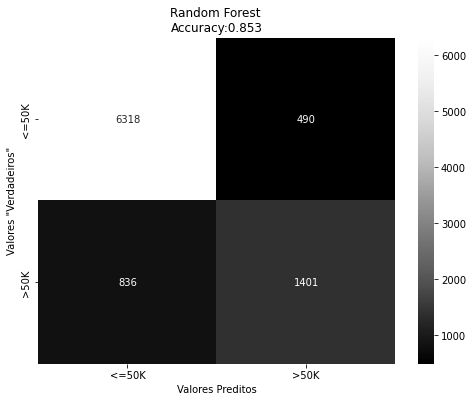

In [ ]:
X = dados.drop(['income'],axis=1)
y = dados['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
                                                    random_state = 123)

clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train,y_train)
y_pred=clf_random.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['<=50K', '>50K'], columns = ['<=50K', '>50K'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                   y_pred)))
plt.ylabel('Valores "Verdadeiros"')
plt.xlabel('Valores Preditos')
plt.show()

# Questão IX

Tarefa para Casa: considerando-se a Tarefa viii avaliar o impacto de outros modelos inteligentes pertinentes na classificação da base desbalanceada utilizada anteriormente. Apresentar o código desenvolvido para cada modelo proposto e avaliar o impacto dos mesmos na classificação e evidentemente da base desbalanceada utilizada.

## SVC

In [ ]:
from sklearn.svm import SVC

# criação de pipeline
pipe_svc = make_pipeline(StandardScaler(), PCA(n_components = 2),
                         SVC(C = 1, kernel = 'rbf', gamma = 0.001,
                             cache_size = 500, random_state = 1))
# Treinamento
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)

print ('Acurácia do Teste: %.3f' %pipe_svc.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Questão IX Modelo SVC")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Questão IX Modelo SVC")

Acurácia do Teste: 0.765

Matriz de confusão para o Questão IX Modelo SVC
Verdadeiro positivo:  6777 Falso negativo:      31
Falso positivo:       2094 Verdadeiro negativo: 143

Classification report para o Questão IX Modelo SVC
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      6808
           1       0.82      0.06      0.12      2237

    accuracy                           0.77      9045
   macro avg       0.79      0.53      0.49      9045
weighted avg       0.78      0.77      0.68      9045



### Curva de aprendizado - *Learning Curve*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html Determines cross-validated training and test scores for different training set sizes.

A cross-validation generator splits the whole dataset k times in training and test data. Subsets of the training set with varying sizes will be used to train the estimator and a score for each training subset size and the test set will be computed. Afterwards, the scores will be averaged over all k runs for each training subset size.

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


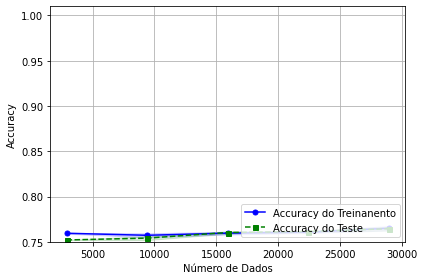

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator = pipe_svc, X = X_train,
                   y = y_train,
                   train_sizes = np.linspace(0.1, 1.0, 5), cv = 5,
                   n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,
         label='Accuracy do Treinanento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle = '--', marker='s',
         markersize = 5, label = 'Accuracy do Teste')
# não estaria incorreto chamar de Accuracy da Validação, do ponto de vista de
# Instrumentação
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Número de Dados')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.7, 0.8])
plt.tight_layout()
plt.show()

### GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV

# param_C_range = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# param_gamma_range = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_C_range = [0.1, 1, 10]
param_gamma_range = [0.01, 0.1, 1.0]
param_grid = [
              # {'svc__C': param_C_range, 'svc__kernel': ['linear']},+6194
              {'svc__C': param_C_range, 'svc__gamma': param_gamma_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', refit = True, cv = 5, n_jobs = -1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
print('Accuracy do Teste: %.3f' %clf.score(X_test, y_test))

NameError: ignored

In [ ]:
from sklearn.svm import SVC

# criação de pipeline
pipe_svc_otimizada = make_pipeline(StandardScaler(), PCA(n_components = 2),
                         SVC(C = 100, kernel = 'rbf', gamma = 0.001,
                             cache_size = 500, random_state = 1))
# Treinamento
pipe_svc_otimizada.fit(X_train, y_train)
y_pred = pipe_svc_otimizada.predict(X_test)

print ('Acurácia do Teste: %.3f' %pipe_svc_otimizada.score(X_test, y_test))

print("")
printConfusionMatrix(y_true = y_test, y_pred = y_pred,
                     model = "Questão IX Modelo SVC Otimizado")
print("")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Questão IX Modelo SVC Otimizado")

Acurácia do Teste: 0.965

Matriz de confusão para o Modelo SVC Otimizado
Verdadeiro positivo:  71 Falso negativo:      1
Falso positivo:       3 Verdadeiro negativo: 39

Classification report para o Modelo SVC Otimizado
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Queestão X

Tarefa para Casa: outra abordagem bem interessante para lidar com um conjunto de
dados desbalanceado é atribuir uma penalidade a cada previsão errada sobre a classe minoritária. Isso pode ser feito usando, por exemplo, um parâmetro peso disponível no scikit-learn (class_weight) que permite atribuir uma penalidade para cada previsão errada relacionada a classe minoritária. Avaliar e discutir esta abordagem no classificador proposto na Tarefa viii. Sugiro consultar e pesquisar sobre.

# Imports e constantes

In [ ]:
%matplotlib inline
import numpy as np
from numpy.random import seed 
import os
import pandas as pd
from PIL import Image
import random   as rn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import metrics
from keras.callbacks import Callback
from keras import backend as K

# import scikitplot
# from scikitplot.metrics import plot_confusion_matrix, plot_roc

IMG_SIZE          = 24
IMG_NUMBER_PIXELS = IMG_SIZE * IMG_SIZE
LEFT              = 0
RIGHT             = 1
CLOSED            = 0
OPEN              = 1

# Trava SEED usando session Keras (metodo recomendado para travar gerador NVIDEA
#  distribuído)
SEED = 1 
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1,
                                        inter_op_parallelism_threads=1)
tf.compat.v1.set_random_seed(SEED)
tf.random.set_seed(SEED)
session = tf.compat.v1.Session(graph = tf.compat.v1.get_default_graph(),
                            config=session_conf)
K.set_session(session)
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(SEED)
rn.seed(SEED)

np.random.rand() # 0.417022004702574

0.417022004702574

In [ ]:
np.random.rand() # 0.7203244934421581

0.7203244934421581

# Seleção de trechos a serem executados e path para exportação de figuras e Tabelas TEX

In [ ]:
flagGeraDataset   = 0
flagDadosCNN      = 1

# Parâmetros para exportação de Figuras
flagSaveFig       = 1
pathFig = path + '/fig/'

# Parâmetros para exportação de tabelas LaTeX
pathTab = path + '/tab/'

# Preparação dos dados

## Leitura dos dados e geração do dataset

In [ ]:
#
  # im = Image.open(path + "/dataset_B_Eye_Images" + "/closedRightEyes" + "/closed_eye_2699.jpg_face_1_R.jpg")
  #  im = Image.open("test.bmp")  # ("Image10.bmp").convert("RGB")
  # mat_pixels = im.load()
  # pixels = np.asarray(im.getdata())
  # print(pixels)
  # npixels = pixels.shape
  # pixels.shape
  # print(f"npixels {npixels}")
if (flagGeraDataset):
  # Path 
  relativePath = "/dataset_B_Eye_Images/"
  pathClosedLeftEyesFolder  = "closedLeftEyes" 
  pathClosedRightEyesFolder = "closedRightEyes" 
  pathOpenLeftEyesFolder    = "openLeftEyes" 
  pathOpenRightEyesFolder   = "openRightEyes"

  # Create DataFrame
  #  Column 0: imagePath (Folder + '/' + image name)
  #  Column 1:  Eye (Left = 0 | Right = 1)
  #  Column 2:  State (Closed = 0 | Open = 1)
  #  Column 3 + 579 | pixels (0: 575)
  dataFrameColumns = ["imageRelativePath", "Eye", "State"]
  for i in range(IMG_NUMBER_PIXELS):
    dataFrameColumns.append("Pixel" + str(i))
  df = pd.DataFrame(columns = [dataFrameColumns])

  pd.options.display.max_columns = 7
  # print("df.head()")

  # List all files in a directory using os.listdir
  filesName = []
  numberOfFiles = 0

  # Closed Left Eye Images
  #  Column 1:  Eye (Left = 0)
  #  Column 2:  State (Closed = 0)
  basePath = path + relativePath + pathClosedLeftEyesFolder
  imageRelativePath = pathClosedLeftEyesFolder
  for entry in os.listdir(basePath):
    if os.path.isfile(os.path.join(basePath, entry)):
      filesName.append(entry)
      numberOfFiles += 1
      # print(entry)
      im = Image.open(basePath + "/" + entry)
      pixels = np.asarray(im.getdata())

      #add row to end of DataFrame
      rowToAppend = np.append(np.array([(imageRelativePath + "/" + entry), LEFT,
                                        CLOSED]),
                              pixels)
      # print(rowToAppend)
      df = df.append(pd.DataFrame(columns=df.columns, data=[rowToAppend]),
                    ignore_index = True)

  # Closed Right Eye Images
  #  Column 1:  Eye (Right = 1)
  #  Column 2:  State (Closed = 0)
  basePath = path + relativePath + pathClosedRightEyesFolder
  imageRelativePath = pathClosedRightEyesFolder
  for entry in os.listdir(basePath):
    if os.path.isfile(os.path.join(basePath, entry)):
      filesName.append(entry)
      numberOfFiles += 1
      # print(entry)
      im = Image.open(basePath + "/" + entry)
      pixels = np.asarray(im.getdata())

      #add row to end of DataFrame
      rowToAppend = np.append(np.array([(imageRelativePath + "/" + entry),
                                        RIGHT, CLOSED]),
                              pixels)
      # print(rowToAppend)
      df = df.append(pd.DataFrame(columns=df.columns, data=[rowToAppend]),
                    ignore_index = True)

  # Open Left Eye Images
  #  Column 1:  Eye (Left = 0)
  #  Column 2:  State (Open = 1)
  basePath = path + relativePath + pathOpenLeftEyesFolder
  imageRelativePath = pathOpenLeftEyesFolder
  for entry in os.listdir(basePath):
    if os.path.isfile(os.path.join(basePath, entry)):
      filesName.append(entry)
      numberOfFiles += 1
      # print(entry)
      im = Image.open(basePath + "/" + entry)
      pixels = np.asarray(im.getdata())

      #add row to end of DataFrame
      rowToAppend = np.append(np.array([(imageRelativePath + "/" + entry), LEFT,
                                        OPEN]),
                              pixels)
      # print(rowToAppend)
      df = df.append(pd.DataFrame(columns=df.columns, data=[rowToAppend]),
                    ignore_index = True)

  # Open Right Eye Images
  #  Column 1:  Eye (Right = 1)
  #  Column 2:  State (Open = 1)
  basePath = path + relativePath + pathOpenRightEyesFolder
  imageRelativePath = pathOpenRightEyesFolder
  for entry in os.listdir(basePath):
    if os.path.isfile(os.path.join(basePath, entry)):
      filesName.append(entry)
      numberOfFiles += 1
      # print(entry)
      im = Image.open(basePath + "/" + entry)
      pixels = np.asarray(im.getdata())

      #add row to end of DataFrame
      rowToAppend = np.append(np.array([(imageRelativePath + "/" + entry),
                                        RIGHT, OPEN]),
                              pixels)
      # print(rowToAppend)
      df = df.append(pd.DataFrame(columns=df.columns, data=[rowToAppend]),
                    ignore_index = True)

  print(f'Number of Files is {numberOfFiles}')
  pd.options.display.max_columns = 7
  df.head(5)
  print(f"df.dtypes:\n{df.dtypes}")

  df.to_csv(path + '/dataset_CEW.csv')

  #
  # print(f'Number of Files is {numberOfFiles}')
  # df.head(5)

  # # imagePath (Folder + image name) | Eye (Left = 0 / Right = 1) | State (Open = 1 | Closed = 0) | pixels (0: 575)


  # # # Mode: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes
  # # #
  # # # The mode of an image is a string which defines the type and depth of a pixel
  # # #  in the image. Each pixel uses the full range of the bit depth. So a 1-bit
  # # #  pixel has a range of 0-1, an 8-bit pixel has a range of 0-255 and so on.
  # # #  The current release supports the following standard modes:
  # # print(im.format, im.size, im.mode)
  # # # JPEG (24, 24) L: (8-bit pixels, black and white)

  # # # charger en mémoire les pixels de l'image
  # # w, h = im.size
  # # # soit w et h,  respectivement, la largeur et la hauteur de l’image
  # # # display width and height
  # # print("The height of the image /is: ", h)
  # # print("The width of the image is: ", w)

## Recarregamento do dataset

In [ ]:
# load the new dataset and summarize
loadedDataset = pd.read_csv(path + '/dataset_CEW.csv', header=0)
print(f"dataset.head(): \n{loadedDataset.head()}")
print(f"dataset.dtypes:\n{loadedDataset.dtypes}")
loadedDataset.describe()


FileNotFoundError: ignored

In [ ]:
# exclusão de dados inúteis
# loadedDataset.columns
dataset = loadedDataset.drop(columns = ['Unnamed: 0', 'imageRelativePath',
                                        'Eye'])
dataset.head()

## Divisão do Dados em Treinamento, Validação e Teste

In [ ]:
# divisão do conjunto de dados
dataset_num = dataset.shape[0]
print(f"dataset_num: {dataset_num}")
indexes = np.random.permutation(dataset_num)
print(f"Aleatorização dos indices: {indexes}")
# divisão dos dados de forma aleatória = razão da divisão: 6:2:2
print(f"\nDivisão dos dados de forma aleatória - razão da divisão: 6:2:2")
train_indexes = indexes[:int(dataset_num * 0.6)]
val_indexes = indexes[int(dataset_num * 0.6):int(dataset_num * 0.8)]
test_indexes = indexes[int(dataset_num * 0.8):]
# print(f"train_indexes:{train_indexes}")
# print(f"val_indexes:{val_indexes}")
# print(f"test_indexes:{test_indexes}")
# recuperação dos dados de treinamento, de validação e de teste
train_data = dataset.loc[train_indexes]
val_data = dataset.loc[val_indexes]
test_data = dataset.loc[test_indexes]
print(f"\nDados de treinamento, de validação e de teste")
print(f"train_data:{train_data.shape}")
print(f"val_data:{val_data.shape}")
print(f"test_data:{test_data.shape}")

## Normalização

In [ ]:
# Normalização
print("Normalização") 
print("dado_normalizado=(dado-(média da população))/desvio padrão da população")
# dado_normalizado = (dado - média da população)/desvio padrão da população
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()
train_data_norm = (train_data - mean)/std
val_data_norm = (val_data - mean)/std

X_train = np.array(train_data_norm.drop('State', axis='columns'))
y_train = np.array(train_data['State'])
X_val = np.array(val_data_norm.drop('State', axis='columns'))
y_val = np.array(val_data['State'])

# determinação do estado de um olho
y_test = np.array(test_data['State'])
#  normalizacão dos dados de teste
test_data_norm = (test_data - mean)/std
# salvar os dados de entrada no formato numpy
X_test = np.array(test_data_norm.drop('State', axis='columns'))

print(f"X_train.shape: {X_train.shape}")
print(f"y_train: {y_train}")
print(f"y_train.shape: {y_train.shape}")
# print(f"X_train: {X_train}")
print(f"X_val.shape:   {X_val.shape}")
print(f"y_val.shape:   {y_val.shape}")
print(f"X_test.shape:  {X_test.shape}")
print(f"y_test.shape:  {y_test.shape}")

# Construção e treino da RNA e Exibição os resultados de treinamento
 - Projetar uma RNA FCNN (modelo 1)
 - Determinar o Otimizador e a Função Perda;
 - Treinar o modelo 1.

## Exibir os resultados de treinamento
 - Verificar a função de perda do treinamento e da validação;
 - Determinar o erro médio com a base de teste.

## Criação do diretório para salvar o modelo e armazenar logs

In [ ]:
## model.
## criação de um diretório para salvar o modelo
## tem que ser um diretório novo (deletar o antigo)
project_dir = "proj-logs/"
model_dir = project_dir + "models/"
# Check whether the specified path is an existing directory or not 
directoryExist = os.path.isdir(model_dir)
if (directoryExist):
  print(f"O diretório {model_dir} já existe")
else:
  print(f"Criando o diretório {model_dir}")
  os.makedirs(model_dir) # para criar um pasta para salvar o modeLo

## Definição do número máximo de épocas

In [ ]:
maxEpochs = 60 
# maxEpochs = 3

## Criação de Classe Callback para Matriz de Confusão e métricas adicionais (Recall, Precision e F1-Score)

https://neptune.ai/blog/keras-metrics

In [ ]:
# def recallmy(y_true, y_pred):
#     y_true = K.ones_like(y_true) 
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
#     recallmyv = true_positives / (all_positives + K.epsilon())
#     return recallmyv

# def precisionmy(y_true, y_pred):
#     y_true = K.ones_like(y_true) 
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
#     predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#     precisionmyv = true_positives / (predicted_positives + K.epsilon())
#     return precisionmyv

# def f1_score(y_true, y_pred):
#     precision_m = precisionmy(y_true, y_pred)
#     recall_m = recallmy(y_true, y_pred)
#     return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))

# from keras.callbacks import Callback
# import matplotlib.pyplot as plt
# import numpy as np
# from scikitplot.metrics import plot_confusion_matrix, plot_roc

# class PerformanceVisualizationCallback(Callback):
#     def __init__(self, model, validation_data, image_dir):
#         super().__init__()
#         self.model = model
#         self.validation_data = validation_data
        
#         os.makedirs(image_dir, exist_ok=True)
#         self.image_dir = image_dir

#     def on_epoch_end(self, epoch, logs={}):
#         y_pred = np.asarray(self.model.predict(self.validation_data[0]))
#         y_true = self.validation_data[1]             
#         y_pred_class = np.argmax(y_pred, axis=1)

#         # plot and save confusion matrix
#         fig, ax = plt.subplots(figsize=(16,12))
#         plot_confusion_matrix(y_true, y_pred_class, ax=ax)
#         fig.savefig(os.path.join(self.image_dir,
#                                  f'confusion_matrix_epoch_{epoch}'))

#       #  # plot and save roc curve
#       #   fig, ax = plt.subplots(figsize=(16,12))
#       #   plot_roc(y_true, y_pred, ax=ax)
#       #   fig.savefig(os.path.join(self.image_dir, f'roc_curve_epoch_{epoch}'))

## Definição dos plots de figuras

In [ ]:
def plotFigureTrainValidationVsEpoch(name, maxNumberOfEpochs, yTrain,
                                     yValidation, xLabel, yLabel, legendLoc):
  figPlot = plt.figure(name)
  plt.plot(yTrain, label='Treinamento')
  plt.plot(yValidation, label='Validação')
  plt.grid()
  plt.xlim(0, maxNumberOfEpochs)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.xlabel(xLabel, fontsize = 14)
  plt.ylabel(yLabel, fontsize = 14)
  plt.legend(loc = legendLoc)
  plt.tight_layout()
  if flagSaveFig:
      plt.savefig(pathFig + name + '.jpg', bbox_inches = 'tight')

def plotTrainValidationVsEpochFigures(history, model):
  nameFigureLossEpoch      = "4. Resultados e Discussões/"
  nameFigureAccuracyEpoch  = "4. Resultados e Discussões/"
  nameFigurePrecisionEpoch = "4. Resultados e Discussões/"
  nameFigureRecallEpoch    = "4. Resultados e Discussões/"

  nameFigureLossEpoch      += "Função Custo vs número de épocas " + model
  nameFigureAccuracyEpoch  += "Accuracy vs número de épocas " + model
  nameFigurePrecisionEpoch += "Precision vs número de épocas " + model
  nameFigureRecallEpoch    += "Recall vs número de épocas " + model

  plotFigureTrainValidationVsEpoch(nameFigureLossEpoch,
                                  maxEpochs, history.history['loss'],
                                  history.history['val_loss'],
                                  "Numéro de Épocas", 'Perda', "upper right")

  figPlot_Model = plt.figure(model, figsize=(0.1,0.1))

  plotFigureTrainValidationVsEpoch(nameFigureAccuracyEpoch,
                                  maxEpochs, history.history['accuracy'],
                                  history.history['val_accuracy'],
                                  "Numéro de Épocas", 'Accuracy', "lower right")

  plt.figure("Space after Accuracy", figsize=(0.1,0.1))

  # plotFigureTrainValidationVsEpoch("F1 score vs número de épocas Modelo 1",
  #                                  maxEpochs, history.history['f1_score'],
  #                                  history.history['val_f1_score'],
  #                                  "Numéro de Épocas", 'F1 score',
  #                                  "upper right")

  # plt.figure("Space after F1 Score", figsize=(0.1,0.1))

  plotFigureTrainValidationVsEpoch(nameFigurePrecisionEpoch,
                                  maxEpochs, history.history['precision'],
                                  history.history['val_precision'],
                                  "Numéro de Épocas", 'Precision',
                                  "lower right")

  plt.figure("Space after Precision", figsize=(0.1,0.1))

  plotFigureTrainValidationVsEpoch(nameFigureRecallEpoch,
                                  maxEpochs, history.history['recall'],
                                  history.history['val_recall'],
                                  "Numéro de Épocas", 'Recall', "lower right")

  plt.figure("Space after Recall", figsize=(0.1,0.1))

## Modelo

In [ ]:
# Criação de uma RNA FCNN - chamada de model-1: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_1 = keras.Sequential(name='model-1')
# a primeira camada da RNA tem 24 neurônios e o formato das entradas tem 
# IMG_NUMBER_PIXELS dados (batch_size = IMG_NUMBER_PIXELS):
model_1.add(layers.Dense(24, activation='relu',
                         input_shape=(IMG_NUMBER_PIXELS,)))
# a segunda camada (24 neurônios):
model_1.add(layers.Dense(24, activation='relu'))
# a camada de saida (1 neurônio)
model_1.add(layers.Dense(1, activation = 'sigmoid'))


model_1.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-1')
model_1_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_1_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-1.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history = model_1.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_1_cbk, model_1_mckp,])

# exibir a arquitetura da RNA proposta
model_1.summary()

plotTrainValidationVsEpochFigures(history, "Modelo 1")

# carga do modeLo
model_1.load_weights(model_dir + '/Best-model-1.h5')
# a predição do estado do olho
y_pred = model_1.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 1")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 1")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 1 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

In [ ]:
history.history.keys() # mostra informações salvas no histórico

## Modelo 2: redução da complexidade do modelo

In [ ]:
# Criação de uma RNA FCNN - chamada de model-1: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_2 = keras.Sequential(name='model-2')
# a primeira camada da RNA tem 6 neurônios e o formato das entradas tem 
# IMG_NUMBER_PIXELS dados (batch_size = IMG_NUMBER_PIXELS):
model_2.add(layers.Dense(6, activation='relu',
                         input_shape=(IMG_NUMBER_PIXELS,)))
# a segunda camada (6 neurônios):
model_2.add(layers.Dense(6, activation='relu'))
# a camada de saida (1 neurônio)
model_2.add(layers.Dense(1, activation = 'sigmoid'))


model_2.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-2')
model_2_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_2_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-2.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history2 = model_2.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_2_cbk, model_2_mckp])

# exibir a arquitetura da RNA proposta
model_2.summary()

plotTrainValidationVsEpochFigures(history2, "Modelo 2")

# carga do modeLo
model_2.load_weights(model_dir + '/Best-model-2.h5')
# a predição do estado do olho
y_pred = model_2.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 2")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 2")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 2 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

In [ ]:
history2.history.keys() # mostra informações salvas no histórico

## Modelo 3: método de regularização

In [ ]:
# Criação de uma RNA FCNN - chamada de model-3: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_3 = keras.Sequential(name='model-3')
# a primeira camada da RNA tem 24 neurônios com a adição do método de
#  regularização L2 e o formato das entradas tem IMG_NUMBER_PIXELS dados 
# (batch_size = IMG_NUMBER_PIXELS):
model_3.add(layers.Dense(24, activation='relu',
                         kernel_regularizer = keras.regularizers.l2(0.01),
                         input_shape=(IMG_NUMBER_PIXELS,)))
# a segunda camada oculta tem 24 neurônios com a adição do método de
#  regularização L2
model_3.add(layers.Dense(24, activation='relu',
                         kernel_regularizer = keras.regularizers.l2(0.01)))
# a camada de saida (1 neurônio)
model_3.add(layers.Dense(1, activation = 'sigmoid'))


model_3.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-3')
model_3_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_3_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-3.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history3 = model_3.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_3_cbk, model_3_mckp])

# exibir a arquitetura da RNA proposta
model_3.summary()

plotTrainValidationVsEpochFigures(history3, "Modelo 3")

# carga do modeLo
model_3.load_weights(model_dir + '/Best-model-3.h5')
# a predição do estado do olho
y_pred = model_3.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 3")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 3")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 3 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

## Modelo 4: método dropout

In [ ]:
# Criação de uma RNA FCNN - chamada de model-4: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_4 = keras.Sequential(name='model-4')
# a primeira camada da RNA tem 24 neurônios e o formato das entradas tem 
# IMG_NUMBER_PIXELS dados (batch_size = IMG_NUMBER_PIXELS):
model_4.add(layers.Dense(24, activation='relu',
                         input_shape=(IMG_NUMBER_PIXELS,)))
# aleatoriamente selecione uma descarga de 20% dos neurônios
model_4.add(layers.Dropout(0.20))
# a segunda camada (24 neurônios):
model_4.add(layers.Dense(24, activation='relu'))
# aleatoriamente selecione uma descarga de 20% dos neurônios
model_4.add(layers.Dropout(0.20))
# a camada de saida (1 neurônio)
model_4.add(layers.Dense(1, activation = 'sigmoid'))


model_4.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-4')
model_4_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_4_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-4.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history4 = model_4.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_4_cbk, model_4_mckp])

# exibir a arquitetura da RNA proposta
model_4.summary()

plotTrainValidationVsEpochFigures(history4, "Modelo 4")

# vamos agora prever o preço com os dados de testes
# carga do modeLo
model_4.load_weights(model_dir + '/Best-model-4.h5')
# a predição do estado do olho
y_pred = model_4.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 4")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 4")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 4 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

## Modelo 5: reduçãoda complexidade do modelo +  método dropout

In [ ]:
# Criação de uma RNA FCNN - chamada de model-5: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_5 = keras.Sequential(name='model-5')
# a primeira camada da RNA tem 10 neurônios e o formato das entradas tem 
# IMG_NUMBER_PIXELS dados (batch_size = IMG_NUMBER_PIXELS):
model_5.add(layers.Dense(10, activation='relu',
                         input_shape=(IMG_NUMBER_PIXELS,)))
# aleatoriamente selecione uma descarga de 15% dos neurônios
model_5.add(layers.Dropout(0.10))
# a segunda camada (4 neurônios):
model_5.add(layers.Dense(4, activation='relu'))
# aleatoriamente selecione uma descarga de 15% dos neurônios
model_5.add(layers.Dropout(0.10))
# a camada de saida (1 neurônio)
model_5.add(layers.Dense(1, activation = 'sigmoid'))


model_5.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-5')
model_5_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_5_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-5.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history5 = model_5.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_5_cbk, model_5_mckp])

# exibir a arquitetura da RNA proposta
model_5.summary()

plotTrainValidationVsEpochFigures(history5, "Modelo 5")

# vamos agora prever o preço com os dados de testes
# carga do modeLo
model_5.load_weights(model_dir + '/Best-model-5.h5')
# a predição do estado do olho
y_pred = model_5.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 5")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 5")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 5 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

## Modelo 6:

In [ ]:
# Criação de uma RNA FCNN - chamada de model-6: 1--> 3 camadas (CE, 2 CO e CS)
# função de ativação ReLU nas camadas ocultas
# a função de ativação da camada de saida não usarei função alguma de ativação

# camadas densas são totalmente conectadas

# criar o modelo sequencial usando a Keras
# toda a RNA envolve camadas totalmente interconectadas
model_6 = keras.Sequential(name='model-6')
# a primeira camada da RNA tem 10 neurônios e o formato das entradas tem 
# IMG_NUMBER_PIXELS dados (batch_size = IMG_NUMBER_PIXELS):
model_6.add(layers.Dense(10, activation='relu',
                         kernel_regularizer = keras.regularizers.l2(0.01),
                         input_shape=(IMG_NUMBER_PIXELS,)))
# aleatoriamente selecione uma descarga de 10% dos neurônios
model_6.add(layers.Dropout(0.10))
# a segunda camada (4 neurônios):
model_6.add(layers.Dense(4, activation='relu',
                         kernel_regularizer = keras.regularizers.l2(0.01)))
# aleatoriamente selecione uma descarga de 10% dos neurônios
model_6.add(layers.Dropout(0.10))
# a camada de saida (1 neurônio)
model_6.add(layers.Dense(1, activation = 'sigmoid'))


model_6.compile(keras.optimizers.Adam(0.001),
              # loss = keras.losses.BinaryCrossentropy(),
              loss="binary_crossentropy",
              metrics = ['accuracy',
                         keras.metrics.Precision(name = 'precision'),
                         keras.metrics.Recall(name = 'recall')])

log_dir = os.path.join(project_dir, 'model-6')
model_6_cbk = keras.callbacks.TensorBoard(log_dir = log_dir)
model_6_mckp = keras.callbacks.ModelCheckpoint(model_dir + 'Best-model-6.h5',
                                               monitor='val_accuracy',
                                               save_best_only = True,
                                               mode = 'max')

# treinar o modelo
history6 = model_6.fit(X_train, y_train, batch_size = IMG_SIZE,
                      epochs = maxEpochs,
                      validation_data = (X_val, y_val),
                      callbacks = [model_6_cbk, model_6_mckp])

# exibir a arquitetura da RNA proposta
model_6.summary()

plotTrainValidationVsEpochFigures(history6, "Modelo 6")

# vamos agora prever o preço com os dados de testes
# carga do modeLo
model_6.load_weights(model_dir + '/Best-model-6.h5')
# a predição do estado do olho
y_pred = model_6.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo 6")
printClassificationReport(y_true = y_test, y_pred = y_pred, model = "Modelo 6")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo 6 - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

# Construção e treino da SVN e Exibição dos resultados do treinamento

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV

# criação de pipeline
pipe_svc = make_pipeline(SVC(cache_size = 500, random_state=SEED))
# Treinamento e predição
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_val)
print('Accuracy: %.3f' %pipe_svc.score(X_val, y_val))

# Preparação dos dados para SVN

## União dos dados de treinamento e de teste

In [ ]:
# União dos conjuntos de treinamento e teste, já
X_train_and_val = np.concatenate((X_train, X_val), axis = 0)
y_train_and_val = np.concatenate((y_train, y_val), axis = 0)

## Curva de aprendizado

In [ ]:
train_sizes, train_scores, test_scores = \
    learning_curve(estimator = pipe_svc, X = X_train_and_val,
                   y = y_train_and_val,
                   train_sizes = np.linspace(0.1, 1.0, 10), cv = 5,
                   n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5,
         label='Accuracy do Treinanento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle = '--', marker='s',
         markersize = 5, label = 'Accuracy do Teste')
# não estaria incorreto chamar de Accuracy da Validação, do ponto de vista de
# Instrumentação
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Número de Dados')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

## GridSearchCV

In [ ]:
param_C_range = [0.01, 0.1, 1.0, 10.0, 100.0]
param_gamma_range = [0.001, 0.01, 0.1, 1.0]
param_grid = [
              # {'svc__C': param_C_range, 'svc__kernel': ['linear']},
              {'svc__C': param_C_range, 'svc__gamma': param_gamma_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', refit = True, cv = 5, n_jobs = -1)
gs = gs.fit(X_train_and_val, y_train_and_val)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
print('Accuracy do Teste: %.3f' %clf.score(X_test, y_test))

In [ ]:
param_C_range = [0.01, 0.1, 1.0, 10.0, 100.0]
# param_gamma_range = [0.001, 0.01, 0.1, 1.0]
param_grid = [
              {'svc__C': param_C_range, 'svc__kernel': ['linear']}]
              # {'svc__C': param_C_range, 'svc__gamma': param_gamma_range,
              #  'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', refit = True, cv = 5, n_jobs = -1)
gs = gs.fit(X_train_and_val, y_train_and_val)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
print('Accuracy do Teste: %.3f' %clf.score(X_test, y_test))

In [ ]:
param_C_range = [7, 7.5, 8.75, 10.0, 12.25, 12.5, 12.75, 13, 13.25, 13.5]
param_gamma_range = [0.0005, 0.00075, 0.0008, 0.000825, 0.00085, 0.000875,
                     0.0009, 0.001, 0.0011,
                     0.001125, 0.001175, 0.0012, 0.00125, 0.0025, 0.005]
param_grid = [
              # {'svc__C': param_C_range, 'svc__kernel': ['linear']},
              {'svc__C': param_C_range, 'svc__gamma': param_gamma_range,
               'svc__kernel': ['rbf']}]
gs = GridSearchCV(estimator = pipe_svc, param_grid = param_grid,
                  scoring = 'accuracy', refit = True, cv = 5, n_jobs = -1)
gs = gs.fit(X_train_and_val, y_train_and_val)
print(gs.best_score_)
print(gs.best_params_)
clf = gs.best_estimator_
print('Accuracy do Teste: %.3f' %clf.score(X_test, y_test))

## Curva de validação

In [ ]:
from sklearn.model_selection import validation_curve

param_C_range = [7, 7.5, 8.75, 10.0, 11.25, 12.25, 12.5, 12.75, 13, 13.5]

pipe_svc_val_C = make_pipeline(SVC(kernel='rbf', gamma = 0.001,
                                   cache_size = 500, random_state=SEED))

train_scores, test_scores = \
    validation_curve(estimator = pipe_svc_val_C, X = X_train_and_val,
                     y = y_train_and_val,
                     param_name = 'svc__C',
                     param_range = param_C_range, cv = 5,
                     n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_C_range, train_mean, color='blue', marker='o', markersize=5,
         label='Accuracy do Treinanento')
plt.fill_between(param_C_range, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_C_range, test_mean, color='green', linestyle = '--', marker='s',
         markersize = 5, label = 'Accuracy do Teste')
# não estaria incorreto chamar de Accuracy da Validação, do ponto de vista de
# Instrumentação
plt.fill_between(param_C_range, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Parâmetro C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve

param_gamma_range = [0.0005, 0.00075, 0.0008, 0.000825, 0.00085, 0.000875,
                     0.0009, 0.001, 0.0011,
                     0.001125, 0.001175, 0.0012, 0.00125, 0.0025, 0.005]

pipe_svc_val_gamma = make_pipeline(SVC(C=10.0, kernel='rbf',
                                       cache_size = 500, random_state=SEED))

train_scores, test_scores = \
    validation_curve(estimator = pipe_svc_val_gamma, X = X_train_and_val,
                     y = y_train_and_val,
                     param_name = 'svc__gamma',
                     param_range = param_gamma_range, cv = 5,
                     n_jobs = -1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_gamma_range, train_mean, color='blue', marker='o', markersize=5,
         label='Accuracy do Treinanento')
plt.fill_between(param_gamma_range, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(param_gamma_range, test_mean, color='green', linestyle = '--', marker='s',
         markersize = 5, label = 'Accuracy do Teste')
# não estaria incorreto chamar de Accuracy da Validação, do ponto de vista de
# Instrumentação
plt.fill_between(param_gamma_range, test_mean + test_std, test_mean - test_std,
                 alpha = 0.15, color = 'green')
plt.grid()
plt.xlabel('Parâmetro Gamma')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

# Construção e treino da SVM optimizada e Exibição dos resultados do treinamento

In [ ]:
# criação de pipeline
pipe_svc_otimizada = make_pipeline(SVC(C=13.0, kernel='rbf', gamma = 0.0008,
                                       cache_size = 500, random_state=SEED))
# Treinamento
pipe_svc_otimizada.fit(X_train_and_val, y_train_and_val,)
# a predição do estado do olho
y_pred = pipe_svc_otimizada.predict(X_test)
# cálculo do erro percentuaL médio
percentage_error = np.mean(np.abs(y_test - y_pred))/np.mean(y_test)*100

printConfusionMatrix(y_true = y_test, y_pred = y_pred, model = "Modelo SVN")
printClassificationReport(y_true = y_test, y_pred = y_pred,
                          model = "Modelo SVN")

print(np.mean(np.abs(y_test - y_pred)))
print(np.mean(y_test))
# exibição do erro percentuaL médio
print("RNA Modelo SVN - Erro Percentual Médio para a base de teste: {:.2f}%"
  .format(percentage_error))

# Seção

# Versões utilizadas

In [ ]:
!python --version
import PIL
import sklearn
print('Matplotlib '     + matplotlib.__version__)
print('Numpy '          + np.__version__        )
print('Pandas '         + pd.__version__        )
print('PIL    '         + PIL.__version__       )
# print('Seaborn '        + sns.__version__       )
print('Sklearn '        + sklearn.__version__   )
# print('SciPy '          + scipy.__version__     )
# print('scikitplot '     + scikitplot.__version__)
print("TensorFlow version: ", tf.__version__)

# print('StatsModels '    + sm.__version__        )
#!pip freeze